# Load modules and data 

In [32]:
import os
import pandas as pd 
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import seaborn as sns

# load data
from keras.datasets import mnist

## preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV


## For dimension reduction
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import umap

## Machine learning models for KNN classification
from sklearn.neighbors import KNeighborsClassifier

# Data visualisation

train_X: (60000, 28, 28)
train_Y: (60000,)
test_X:  (10000, 28, 28)
test_Y:  (10000,)


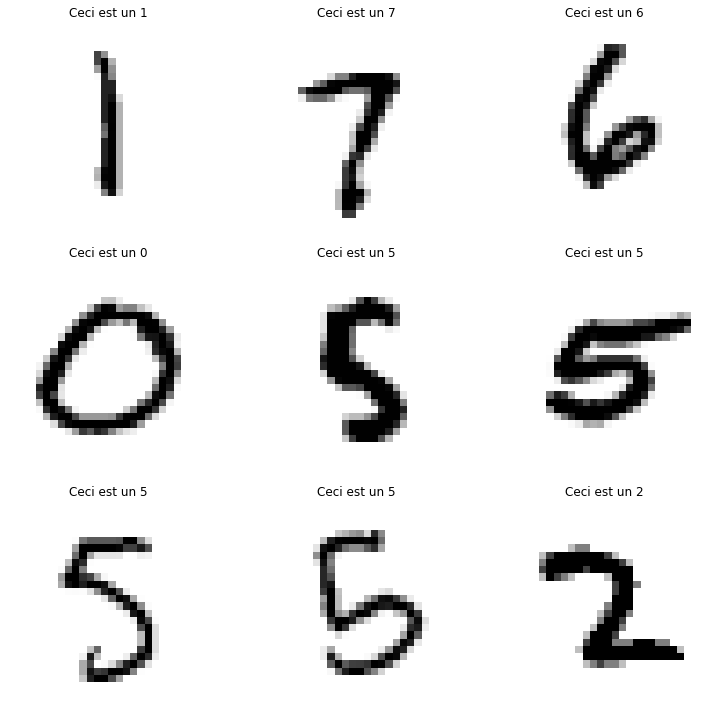

In [4]:
 
#loading
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()
 
#shape of dataset
print('train_X: ' + str(train_X.shape))
print('train_Y: ' + str(train_Y.shape))
print('test_X:  '  + str(test_X.shape))
print('test_Y:  '  + str(test_Y.shape))
 

# Create plt objects
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for ax in axes.flat:
    i = np.random.randint(len(train_X)) #Chose a random elt of the dataset train 
    ax.imshow(train_X[i], cmap='gray_r') 
    ax.set_title(f"Ceci est un {train_Y[i]}")
    ax.axis('off')


# put more space between each image
plt.tight_layout(h_pad=2,w_pad=5)
plt.show()

# UMAP dimension reduction 

In [7]:

class Reshaper(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.reshape(X.shape[0], -1)

In [28]:
# make a pipeline_pca avec StandardScaler et PCA
pipeline_umap = Pipeline([
    ('reshaper', Reshaper()),
    ('scaler', StandardScaler()),
    ('umap', umap.UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False))
])


# Entraînement du pipeline sur les données train_X
train_X_umap = pipeline_umap.fit_transform(train_X)

test_X_umap = pipeline_umap.transform(test_X)

/home/ibotcazou/.local/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


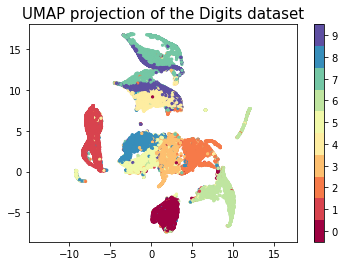

In [31]:
plt.scatter(train_X_umap[:, 0], train_X_umap[:, 1], c=train_Y, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=15)
plt.show()


# KNN with new features

In [35]:
parm_grid = {'n_neighbors':np.arange(1,30),
             'metric':['euclidean']}


grid = GridSearchCV(KNeighborsClassifier(),parm_grid, cv=5,verbose=3,)
#cv pour cross validation avec 5 partitions, tournante sur 4 train et 1 pour test 
# parm_grid dico pour les tests 

grid.fit(train_X_umap,train_Y) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits
[CV 1/5] END ...metric=euclidean, n_neighbors=1;, score=0.879 total time=   0.5s
[CV 2/5] END ...metric=euclidean, n_neighbors=1;, score=0.874 total time=   0.4s
[CV 3/5] END ...metric=euclidean, n_neighbors=1;, score=0.876 total time=   0.4s
[CV 4/5] END ...metric=euclidean, n_neighbors=1;, score=0.878 total time=   0.4s
[CV 5/5] END ...metric=euclidean, n_neighbors=1;, score=0.884 total time=   0.3s
[CV 1/5] END ...metric=euclidean, n_neighbors=2;, score=0.882 total time=   0.3s
[CV 2/5] END ...metric=euclidean, n_neighbors=2;, score=0.879 total time=   0.3s
[CV 3/5] END ...metric=euclidean, n_neighbors=2;, score=0.880 total time=   0.3s
[CV 4/5] END ...metric=euclidean, n_neighbors=2;, score=0.880 total time=   0.3s
[CV 5/5] END ...metric=euclidean, n_neighbors=2;, score=0.885 total time=   0.3s
[CV 1/5] END ...metric=euclidean, n_neighbors=3;, score=0.908 total time=   0.3s
[CV 2/5] END ...metric=euclidean, n_neighbors=3

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             verbose=3)

In [36]:
print("Les meilleurs paramètres:\n",grid.best_params_)

best_model = grid.best_estimator_
print("best score  données train= ", best_model.score(train_X_umap,train_Y))
print("best score  données test = ", best_model.score(test_X_umap,test_Y))

Les meilleurs paramètres:
 {'metric': 'euclidean', 'n_neighbors': 11}
best score  données train=  0.9250666666666667
best score  données test =  0.9152


In [37]:
y_pred_test = best_model.predict(test_X_umap)

accuracy = len(y_pred_test[y_pred_test == test_Y])/len(y_pred_test)

print(f"Accuracy = {accuracy}")

Accuracy = 0.9152


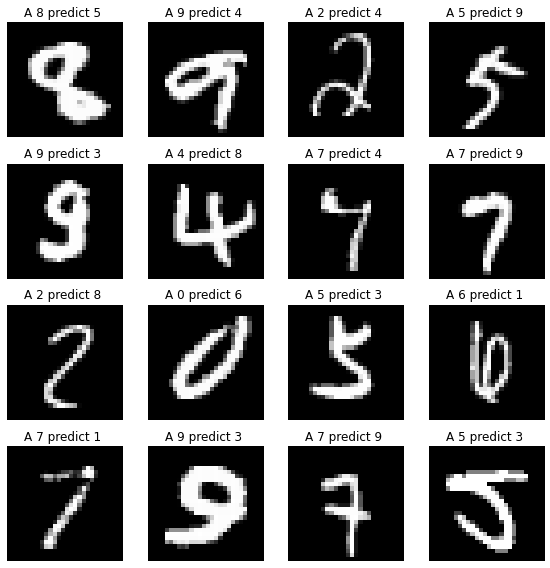

In [38]:
x_faux = test_X[y_pred_test!=test_Y]
y_pred_faux = y_pred_test[y_pred_test!=test_Y]
y_faux = test_Y[y_pred_test!=test_Y]


# Créez une figure et une grille de sous-graphiques
fig, axes = plt.subplots(4, 4, figsize=(8, 8))

for _, ax in enumerate(axes.flat):
    i = np.random.randint(len(x_faux))
    ax.imshow(x_faux[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f"A {y_faux[i]} predict {y_pred_faux[i]} ")# {y_pred_faux[i]} 

# Ajustez l'espacement entre les sous-graphiques si nécessaire
plt.tight_layout(h_pad=1,w_pad=1)

# Affichez la figure
plt.show()

# Regression logistic multiclasses 

In [30]:
from sklearn.linear_model import LogisticRegression

Model_reg_log = LogisticRegression(max_iter=100, multi_class='multinomial', verbose=2)

Model_reg_log.fit(train_X_umap,train_Y)

print("best score  données train= ", Model_reg_log.score(train_X_umap,train_Y))
print("best score  données test = ", Model_reg_log.score(test_X_umap,test_Y))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           30     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  9.82467D-01

At iterate    1    f=  1.69626D+00    |proj g|=  1.64922D+00

At iterate    2    f=  1.69479D+00    |proj g|=  1.61991D+00

At iterate    3    f=  1.47148D+00    |proj g|=  6.94939D-01

At iterate    4    f=  1.40739D+00    |proj g|=  2.12174D-01

At iterate    5    f=  1.37196D+00    |proj g|=  1.83859D-01

At iterate    6    f=  1.30604D+00    |proj g|=  7.15826D-01

At iterate    7    f=  1.24451D+00    |proj g|=  8.86088D-02

At iterate    8    f=  1.22428D+00    |proj g|=  6.43652D-02

At iterate    9    f=  1.17774D+00    |proj g|=  1.22625D-01

At iterate   10    f=  1.15448D+00    |proj g|=  3.30282D-01

At iterate   11    f=  1.14248D+00    |proj g|=  1.12473D-01

At iterate   12    f=  1.13401D+00    |proj g|=  1.07038

/home/ibotcazou/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
